Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.


1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!


In [3]:
#Importação de bibliotecas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import folium
from folium.plugins import MarkerCluster
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Leitura dos dados
df = pd.read_csv('gdrive/My Drive/teste_indicium_precificacao.csv')

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head() # Mostrar as primeiras linhas


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [6]:
df.tail() # Mostrar as últimas linhas

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
#Pela linha de código abaixo, vemos que as colunas nome, host_name, ultima_review e reviews_por_mes tem dados faltantes.
df.info() # Informações sobre os tipos de dados e valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [8]:
df.describe() # Estatísticas descritivas para variáveis numéricas

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
df.shape # Dimensões do DataFrame (linhas e colunas)

(48894, 16)

In [6]:
# Agora é necessário fazer a identificação e tratamento dos dados ausentes.
# Os campos 'nome' e 'host_name' que estão faltando serão preenchidos com 'Não informado'.
df['nome'].fillna("Não informado", inplace=True)
df['host_name'].fillna("Não informado", inplace=True)

# Para o campo 'ultima_review'será preenchido com uma data padrão, 1900-01-01, que representa uma data inicial
df['ultima_review'].fillna("1900-01-01", inplace=True)

# Para o campo 'reviews_por_mes' será preenchido com 0
df['reviews_por_mes'].fillna(0, inplace=True)

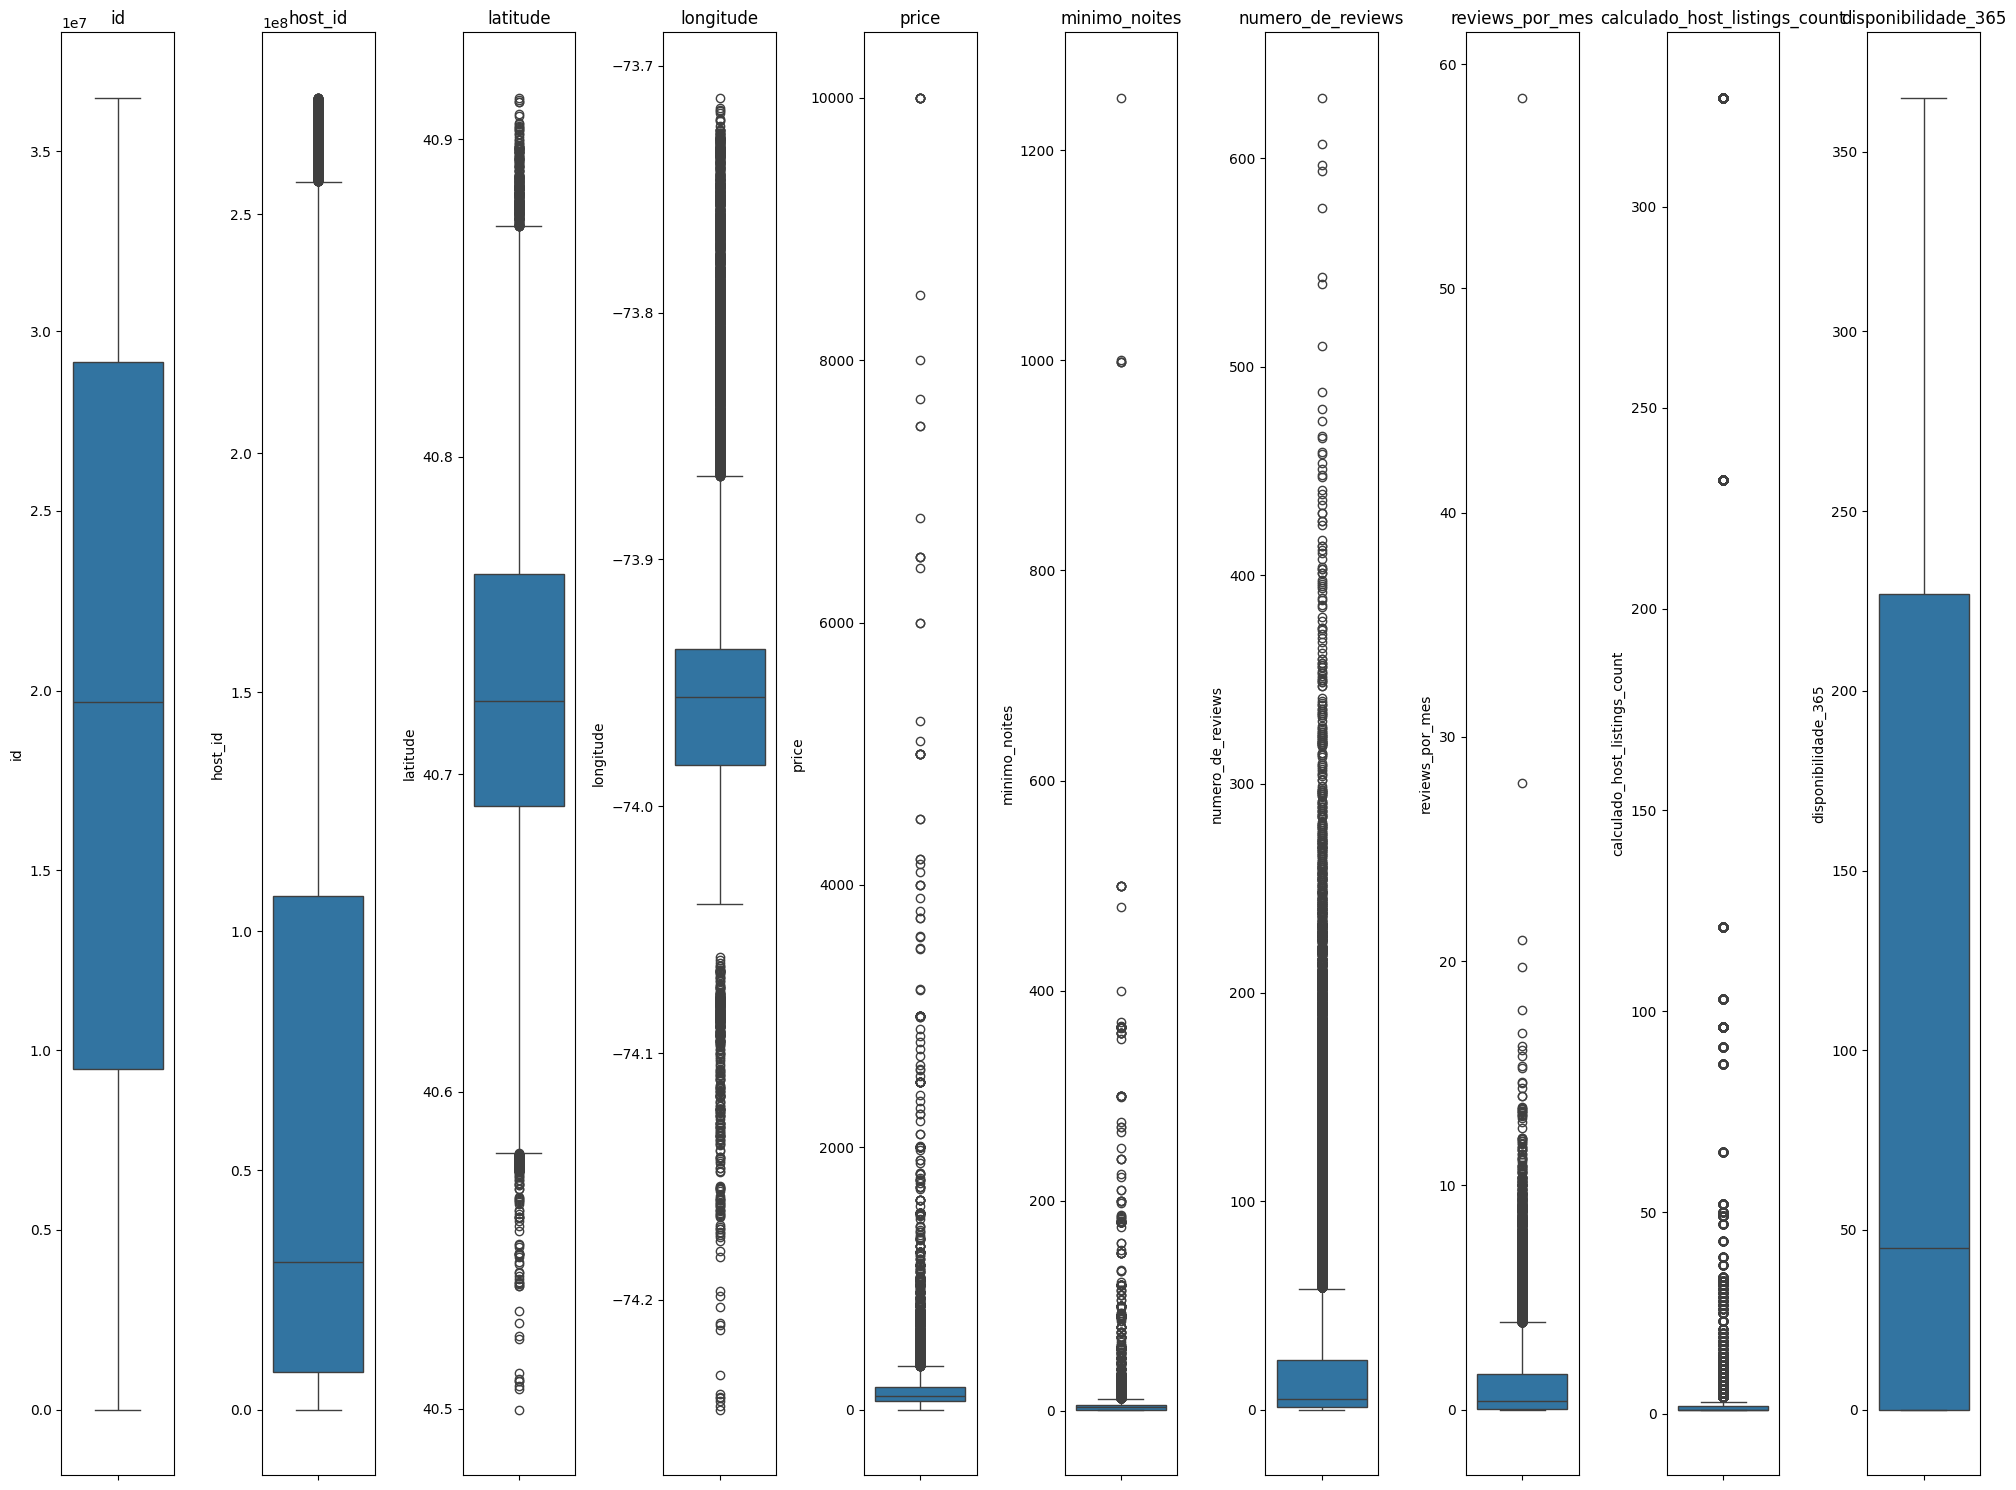

In [68]:
#Agora, com ajuda da seaborn, vamos plotar boxplots das features numéricas:
numeric_cols = df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(20, 15))

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout() # Para evitar sobreposição dos títulos
plt.show()

In [7]:
#É interessante conferir se os dados geográficos são mesmo de Nova York

# Coordenadas aproximadas para a área metropolitana de Nova York
lat_min = 40.5
lat_max = 41.0
lon_min = -74.3
lon_max = -73.7

# Filtrando o DataFrame
df_nyc = df[(df['latitude'] >= lat_min) & (df['latitude'] <= lat_max) &
            (df['longitude'] >= lon_min) & (df['longitude'] <= lon_max)]


Pelos boxplots acima fica evidente que algumas features possuem muitos outliers e eles afetam algoritmos de previsão. Abaixo eu utilizo o algoritmo z-score por ser um algoritmo simples e muito difundido na literatura para detecção de outliers. Optei por simplicidade por eliminar os mesmos, mas poderia, se houvesse tempo hábil, testar alguns algoritmos (como KNN imputer) para "corrigir" os outliers.

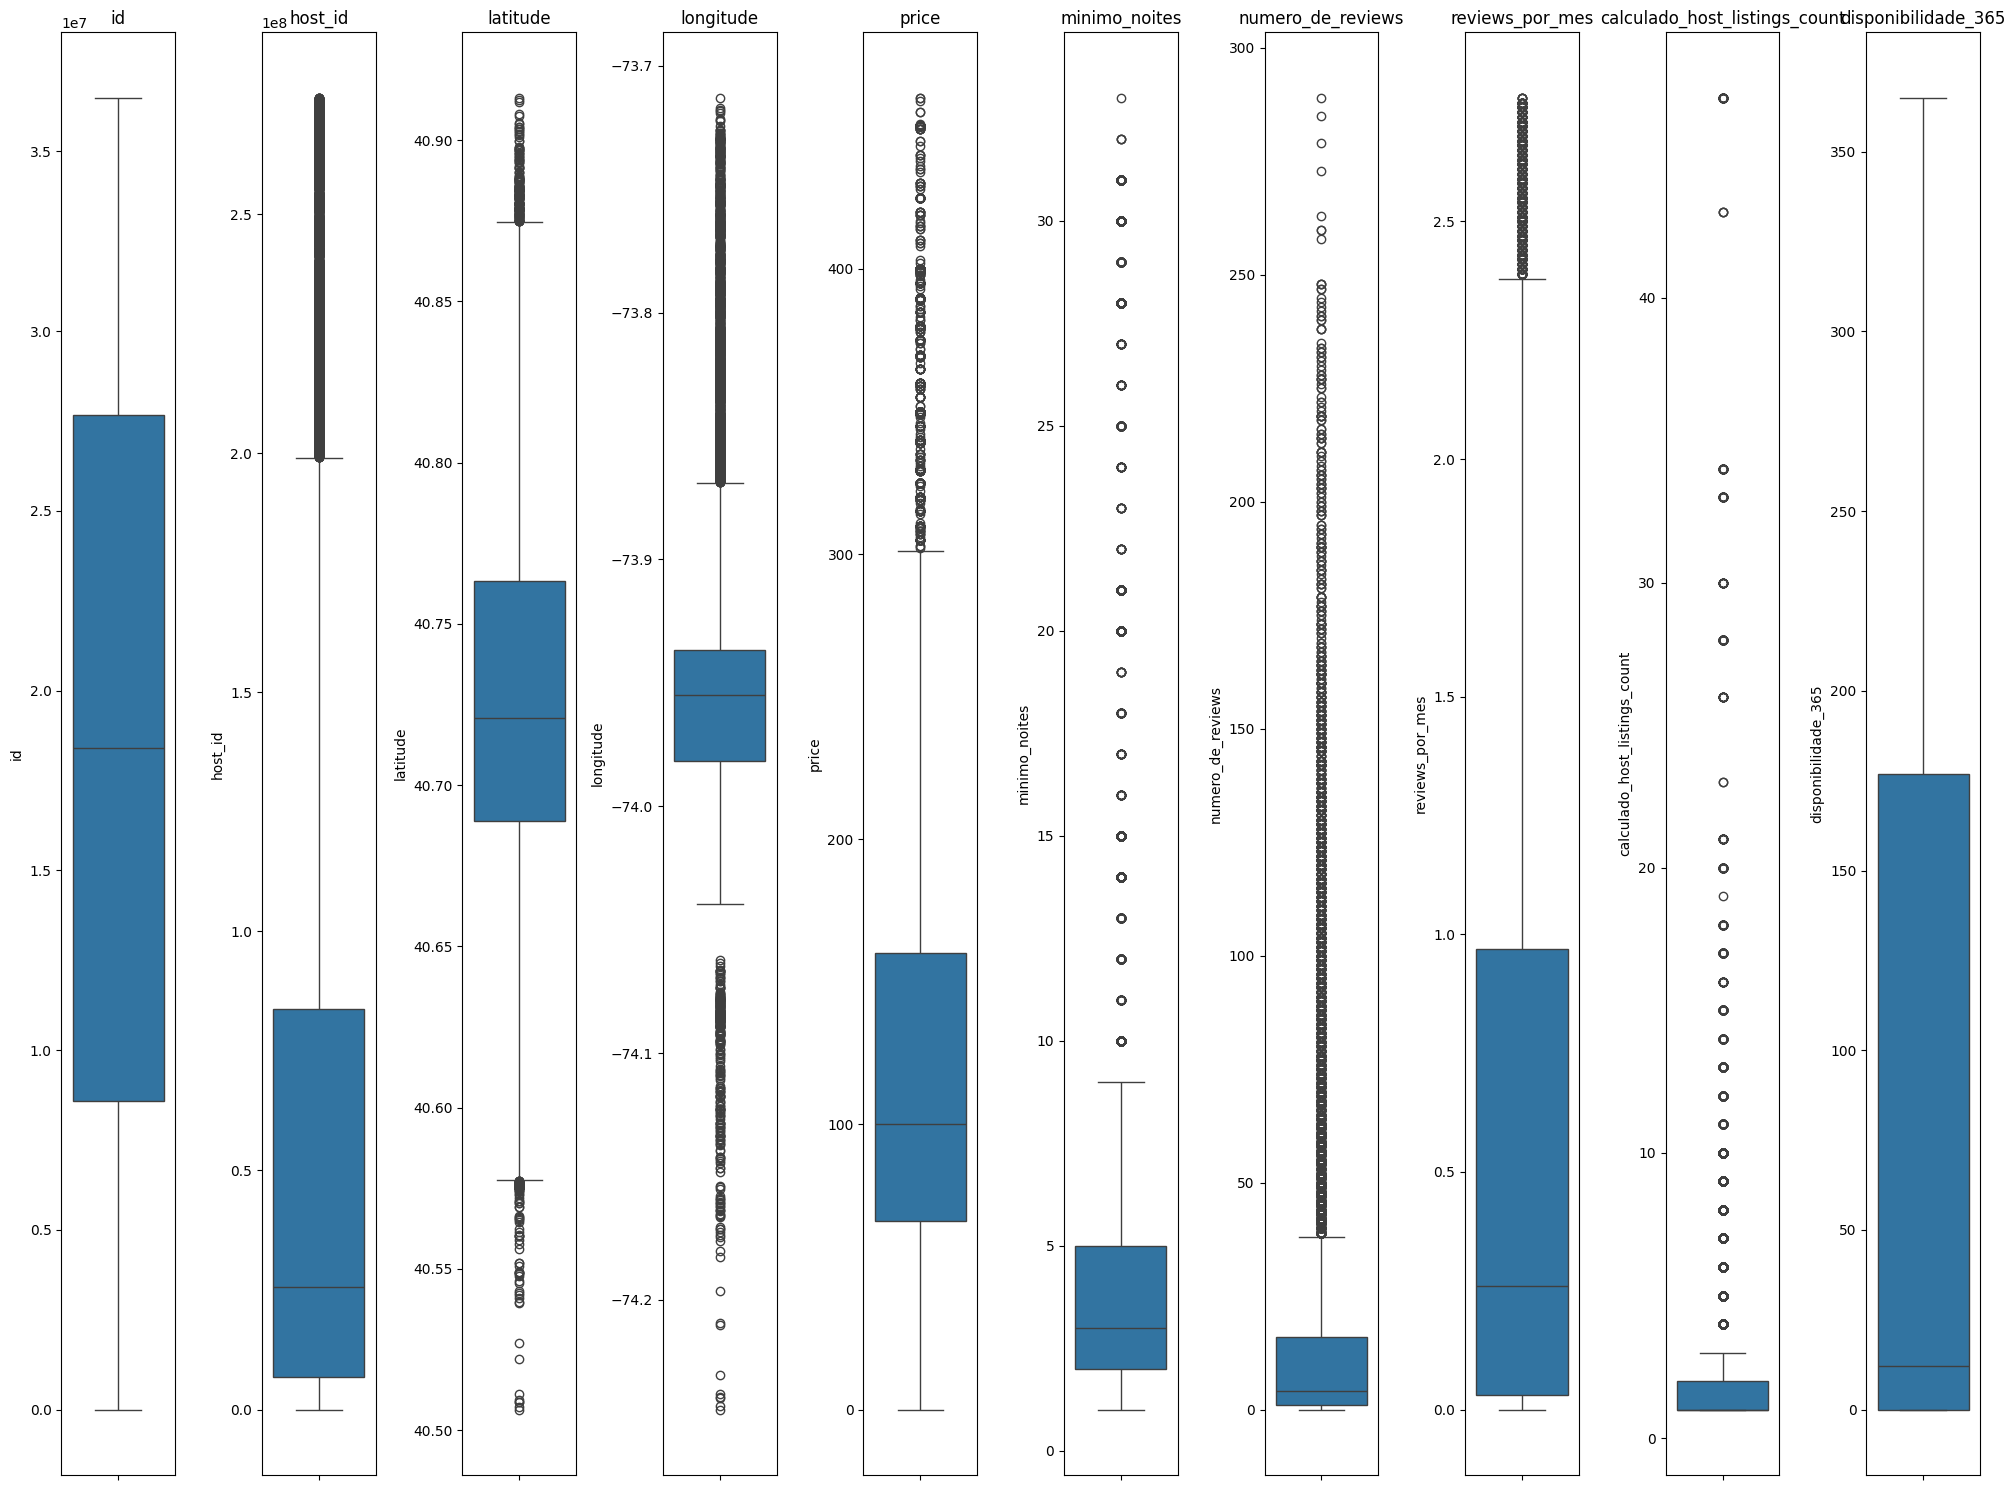

In [8]:
from scipy import stats
def distance_based_outlier_detection(df, colunas, threshold=1.5):
    """
    Identifica outliers com base na distância da mediana, considerando colunas específicas.

    Args:
        df: DataFrame.
        colunas: Lista de strings com os nomes das colunas a serem analisadas.
        threshold: Limite de distância para detecção de outliers.

    Retorno:
        DataFrame pandas com uma nova coluna 'outlier' indicando True para outliers.
        Retorna o DataFrame original caso não haja colunas numéricas ou as colunas especificadas não existam.
    """

    # Verifica se as colunas especificadas existem no DataFrame
    if not all(col in df.columns for col in colunas):
        print("Erro: Algumas colunas especificadas não existem no DataFrame.")
        return df

    # Seleciona apenas as colunas numéricas DENTRO das colunas especificadas
    df_numeric = df[colunas].select_dtypes(include=np.number)

    # Verifica se sobrou alguma coluna numérica após a seleção
    if df_numeric.empty:
        print("Erro: Nenhuma das colunas especificadas contém dados numéricos.")
        return df

    z_scores = stats.zscore(df_numeric)
    distances = np.linalg.norm(z_scores - np.median(z_scores, axis=0), axis=1)

    df_com_outlier = df.copy()
    df_com_outlier['outlier'] = False
    df_com_outlier.loc[distances > threshold, 'outlier'] = True
    return df_com_outlier

# Exemplo de uso, especificando as colunas 'minimo_noites', 'price', 'reviews_por_mes' e 'calculado_host_listings_count'
columns_to_analyze = ['minimo_noites', 'price','reviews_por_mes','calculado_host_listings_count']
df_outliers = distance_based_outlier_detection(df_nyc, columns_to_analyze)

if not 'outlier' in df_outliers.columns:
    print("Não foi possível gerar os outliers, verifique se há colunas numéricas ou se as colunas existem")
else:
    # Filtra os dados para os boxplots (sem outliers)
    df_filtered = df_outliers[~df_outliers['outlier']]

    # Boxplots (adaptado para lidar com possíveis DataFrames vazios após a filtragem)
    if not df_filtered.empty: # Verifica se o dataframe não está vazio antes de gerar os gráficos
        numeric_cols = df_filtered.select_dtypes(include=np.number).columns
        if not numeric_cols.empty: #Verifica se há colunas numéricas após a filtragem
            fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(20, 15))
            for i, col in enumerate(numeric_cols):
                sns.boxplot(y=df_filtered[col], ax=axes[i])
                axes[i].set_title(col)
            plt.tight_layout()
            plt.show()
        else:
            print("Não há colunas numéricas para gerar boxplots após a filtragem de outliers.")
    else:
        print("Não há dados restantes após a remoção de outliers. Não é possível gerar boxplots.")


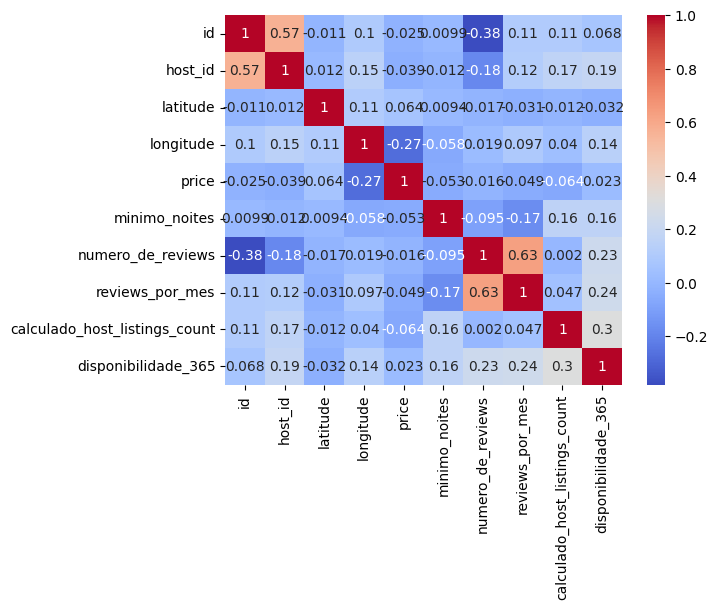

In [9]:
#Após a retirada dos outliers é possível fazer mais algumas análises.
df_numeric = df_filtered.select_dtypes(include=np.number)
matriz_correlacao = df_numeric.corr()
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.show()

In [10]:
sns.pairplot(df_numeric)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Após a visualização da matriz de correlação e os gráficos acima, não é possível dizer que há uma relação linear forte entre as variáveis analisadas.

Responda também às seguintes perguntas:
a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


In [11]:
#Abaixo estão algumas análises
#Supondo que 'disponibilidade_365' são os dias que o local estava disponível para locação, é possível calcular a receita anual como sendo o preço da diárias multiplicado
#pelo número de dias que o local ficou ocupado. O percentual de ocupação é igual a disponibilidade dividido pelo número de dias do ano.
#No código abaixo, para escolher o melhor local para comprar um imóvel para investir, deve ser o bairro com maior receita, maior taxa de ocupação e menor concorrência, como escolher?
df_filtered['receita_anual_estimada'] = df_filtered['price'] * (365-df_filtered['disponibilidade_365'])
df_filtered['taxa_de_ocupacao'] = 1 - (df_filtered['disponibilidade_365'] / 365)

analise_por_bairro = df_filtered.groupby('bairro').agg(
    receita_media=('receita_anual_estimada', 'mean'),
    taxa_ocupacao_media=('taxa_de_ocupacao', 'mean'),
    num_reviews_medio=('numero_de_reviews', 'mean'),
    preco_medio=('price', 'mean'),
    contagem_imoveis=('bairro', 'size'),
    area = ('bairro_group','first')
).sort_values('receita_media', ascending=False)

# Criando uma pontuação ponderada
analise_por_bairro['pontuacao'] = (
    analise_por_bairro['receita_media'] * 0.5 +
    analise_por_bairro['taxa_ocupacao_media'] * 0.2 +
    (1 / analise_por_bairro['contagem_imoveis']) * 0.3
)

# Ordenando pela pontuação
analise_por_bairro = analise_por_bairro.sort_values('pontuacao', ascending=False)

# Mostrando os 10 melhores bairros
print("Análise por Bairro (Top 10 por Pontuação):")
print(analise_por_bairro.head(10))



Análise por Bairro (Top 10 por Pontuação):
                   receita_media  taxa_ocupacao_media  num_reviews_medio  \
bairro                                                                     
NoHo                65202.383333             0.763059          10.350000   
Tribeca             63098.102273             0.813325          10.806818   
West Village        60566.747126             0.823767          15.527094   
Flatiron District   57097.920000             0.803890           9.940000   
Greenwich Village   56813.439103             0.837460          14.073718   
Breezy Point        56798.333333             0.725114           1.666667   
Todt Hill           55666.000000             0.756164           4.000000   
Chelsea             54892.204993             0.798589          14.215506   
Nolita              54550.148325             0.846798          14.693780   
Vinegar Hill        53239.620690             0.833444           8.862069   

                   preco_medio  contagem_imo

No código abaixo utilizei a biblioteca folium para gerar um mapa com todas as acomodações, em cada local é possível clicar no pin e saber o valor da diária e o tipo de acomodação. Outras funcionalidades poderam ser inseridas mas é só para ter uma noção das acomodações em cada local.

In [12]:
center_lat, center_lon = df_filtered['latitude'].mean(), df_filtered['longitude'].mean()
mapa = folium.Map(location=[center_lat, center_lon], zoom_start=15, control_scale=False,tiles="OpenStreetMap")
marker_cluster = MarkerCluster().add_to(mapa)

for index, row in df_filtered.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    preco = row['price']
    tipo = row['room_type']

    # Definindo a cor do marcador
    if preco < 100:
        color = 'green'
    elif preco >= 100 and preco < 200:
        color = 'orange'
    else:
        color = 'red'

    folium.Marker(
        location=[lat, lon],
        popup=f"Tipo de acomodação: {tipo}, Diária: ${round(preco,2)}",
        icon=folium.Icon(color=color)
    ).add_to(marker_cluster)
mapa

Output hidden; open in https://colab.research.google.com to view.

Pela análise acima, levando em conta a receita média anual, a taxa de ocupação e a concorrência (número de acomodações em cada bairro na plataforma), pode-se perceber que a melhor área é Manhattan e os melhores bairros são Tribeca, NoHo e West Village. Uma pontuação foi atribuída para cada bairro para confirmar os melhores (no quesito receita anual). Mas claro que outras variáveis precisariam ser consideradas, como o preço dos imóveis, características dos imóveis e do próprio bairro.

2. b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


Pelo cálculo da correlação e visualização dos pairplots, fica evidente que o mínimo de noites e a disponibilidade não possuem correlação linear com o preço, ou seja, não é visível a relação. Porém ao aplicar o algoritmo XGBoost para previsão do preço (código mais abaixo), e testando a importância de cada feature, mínimo de noites ficou em quarto e a disponibilidade ficou em sexto no ranking de importância destas variáveis para a previsão do preço.

2. c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')
# Filtrar as acomodações com os preços mais altos
top_price_accommodations = df_filtered.nlargest(100, 'price')

# Tokenizar os nomes e remover stop words
def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

top_price_accommodations['tokens'] = top_price_accommodations['nome'].apply(tokenize_and_remove_stopwords)

# Contar a frequência das palavras
from collections import Counter
all_words = [word for tokens in top_price_accommodations['tokens'] for word in tokens]
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

print(common_words)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...


[(',', 15), ('bedroom', 15), ('2', 14), ('apartment', 13), ('loft', 12), ('park', 10), ('!', 10), ('beautiful', 9), ('brooklyn', 9), ('.', 8)]


[nltk_data]   Unzipping corpora/stopwords.zip.


Pela análise acima não se pode dizer que existe um padrão, mas existem palavras ou caracteres que se repetem mais comumente no nome dos locais mais caros. Ou seja, no nome da acomodação já se especifica várias qualidades do imóvel, como o fato de ser luxuoso.

3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


O problema de previsão do preço da diária é um problema de regressão e as variáveis que possivelmente influenciam na previsão são a localização do imóvel, tipo de acomodação, o número de reviews e a disponibilidade. É necessário transformar as variáveis categóricas (bairro_group, tipo de acomodação) em numéricas, podendo ser por meio de one hot encoding, label encoding, dentre outros métodos. Para este problema é possível aplicar regressão linear, regressão polinomial, árvore de decisão, random forest, XGBoost e até redes neurais. Todas elas tem vantagens e desvantagens e a sua aplicação vai depender muito do problema em si, dos dados, de questões como overfitting, das necessidades e dos recursos para resolver o problema. De fato, em geral o ideal é testar as variadas técnicas e ver quais melhor respondem ao problema. Como eu não tinha muito tempo hábil e já tinha aplicado XGBoost anteriormente em outro problema, apliquei novamente neste. Os parâmetros do algoritmo foram modificados empiricamente. As medidas de performance usadas foram RMSE (Root Mean Squared Error), MAE (Mean Absolute Error) e R², pois são medidas clássicas de avaliação de modelos de regressão. É notório que o modelo pode ser melhorado, uma vez que quanto mais próximo de 1 R² é, melhor.

In [23]:
#No código abaixo, como escolher o local para salvar o modelo .pkl?
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from xgboost import XGBRegressor

#df_filtered = pd.get_dummies(df_filtered, columns=['room_type','bairro_group'])
X = df_filtered.drop(['price','id','host_id','host_name','ultima_review','nome','bairro','receita_anual_estimada','taxa_de_ocupacao','outlier'], axis=1)
y = df_filtered['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria e treina o modelo XGBoost
model = XGBRegressor(objective='reg:squarederror',  # Função objetivo para regressão
                         n_estimators=100,  # Número de árvores (ajuste conforme necessário)
                         learning_rate=0.5,  # Taxa de aprendizado (ajuste conforme necessário)
                         max_depth=3,  # Profundidade máxima das árvores (ajuste conforme necessário)
                         random_state=42)  # Semente aleatória para reproducibilidade

model.fit(X_train, y_train)  # Treina o modelo XGBoost
# Obtendo a importância das características
importances = model.feature_importances_

# Ordenando as características por importância
indices = np.argsort(importances)[::-1]
feature_names = X.columns
# Imprimindo a importância de cada característica
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
y_pred = model.predict(X_test)  # Faz previsões com XGBoost

mse = mean_squared_error(y_test, y_pred)
rmse_test = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE Teste:', rmse_test)
print(f"R²: {r2}")

# Salva o modelo XGBoost
caminho_arquivo = '/content/gdrive/MyDrive/modelo_xgboost.pkl'
with open(caminho_arquivo, 'wb') as file:
    pickle.dump(model, file)


1. feature room_type_Entire home/apt (0.713616)
2. feature bairro_group_Manhattan (0.074197)
3. feature longitude (0.040109)
4. feature minimo_noites (0.035797)
5. feature latitude (0.030539)
6. feature disponibilidade_365 (0.026793)
7. feature room_type_Private room (0.019725)
8. feature bairro_group_Brooklyn (0.012141)
9. feature room_type_Shared room (0.011711)
10. feature numero_de_reviews (0.010258)
11. feature reviews_por_mes (0.009848)
12. feature calculado_host_listings_count (0.008943)
13. feature bairro_group_Staten Island (0.004560)
14. feature bairro_group_Bronx (0.001762)
15. feature bairro_group_Queens (0.000000)
MSE: 3062.581787109375
RMSE Teste: 55.340598001009845
R²: 0.5118298530578613


4. Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?


In [24]:
import pickle

# Carregar o modelo treinado
with open(caminho_arquivo, 'rb') as file:
    model = pickle.load(file)

if 'outlier' in df_filtered.columns:
    df_filtered = df_filtered.drop('outlier', axis=1)

X = df_filtered.drop(['price', 'id', 'host_id', 'host_name', 'ultima_review', 'nome', 'bairro', 'receita_anual_estimada', 'taxa_de_ocupacao'], axis=1)

def prever_preco(novos_dados, X_train_columns):
    try:
        # Pré-processamento dos novos dados:
        if not isinstance(novos_dados, pd.DataFrame):
            raise TypeError("novos_dados deve ser um DataFrame do pandas.")

        # Remover colunas antes da codificação one-hot
        novos_dados = novos_dados.drop(['id', 'host_id', 'host_name', 'ultima_review', 'nome', 'bairro'], axis=1)

        # Codificação one-hot
        novos_dados = pd.get_dummies(novos_dados, columns=['room_type', 'bairro_group'])

        # Alinhamento de colunas
        novos_dados = novos_dados.reindex(columns=X_train_columns, fill_value=0)

        # Fazer a previsão
        preco_previsto = model.predict(novos_dados)

        return preco_previsto[0]

    except Exception as e:
        print(f"Erro ao prever o preço: {e}")
        return None

novos_dados = pd.DataFrame({'id': [2595],'nome': ['Skylit Midtown Castle'], 'host_id': [2845],'host_name': ['Jennifer'],'bairro_group': ['Manhattan'],'bairro': ['Midtown'],'latitude': [40.75362],'longitude': [-73.98377],
                            'room_type': ['Entire home/apt'],'minimo_noites': [1],'numero_de_reviews': [45],'ultima_review': ['2019-05-21'],'reviews_por_mes': [0.38],'calculado_host_listings_count': [2],
                            'disponibilidade_365': [355]})
# Obter as colunas de X
X_train_columns = X.columns  # Usa X.columns

# Chamar a função prever_preco com as colunas de X
preco_previsto = prever_preco(novos_dados, X_train_columns)

if preco_previsto is not None:
    print(f"Preço previsto: U$ {preco_previsto:.2f}")

Preço previsto: U$ 355.61
